# Import Libraries 

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import geopandas as gdp
import folium
import mapclassify
import contextily as cx

# Load DataSet

In [87]:
df = pd.read_csv('Data/Natural_Gas_Market_Hubs.csv')
df.head()

,X,Y,FID,Region,State,Hub_name,Adminstr,Operator,Typeoper,Yr_activat,...,Notes,City,County_1,County_2,Authority,Rates,Platform,Yearofdata,Latitude,Longitude
0,-107.956990,36.686394,1,Southwest,NM,Blanco Hub,Transwestern Gas Pipeline Co,Transwestern Gas Pipeline Co,Production Hub,1993,...,Growth since 03: 77% in avg daily & 22% interc...,,San Juan,,NGA Section 7,Max - Discount,Intercontinental Exch (San Juan),2009,36.6864,-107.9570
1,-100.458991,35.833694,2,Southwest,TX,Buffalo Wallow Center,KM Interstate Gas Transmission co,KM Interstate Gas Transmission co,Market Center,1994,...,Routes flows southward (through WAHA to East T...,,Hemphill,,FERC Section 311,Max - Discount,No,1999,35.8337,-100.4590
2,-94.278893,32.159594,3,Southwest,TX,Carthage Hub,DCP Midstream Partners LP,DCP Midstream Inc,Production Hub,1990,...,Site primarily delivers processed gas from Eas...,,Panola,,FERC Section 311 & State,Max - Discount,Intercontinental Exchange,2008,32.1596,-94.2789
3,-88.263894,41.500192,4,Midwest,IL,Chicago Hub,Enerchange Inc,Northern Illinois Gas Co (Nicor),Market Center,1993,...,"Nicor Enerchange Hub Administration, commonly ...",NaN,Various,,FERC Section 311,Max - Discount,"NGX, Intercontinental Exchange",2008,41.5002,-88.2639
4,-77.789997,41.397892,5,Northeast,PA,Ellisburg-Leidy Center,National Fuel Gas Supply Co,National Fuel Gas Supply Co,Market Center,1993,...,No longer a formal market center although hub ...,,Potter,Clinton,FERC Section 311,Max - Discount,Gas Daily,2008,41.3979,-77.7900


# Data Analysis 

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           58 non-null     float64
 1   Y           58 non-null     float64
 2   FID         58 non-null     int64  
 3   Region      58 non-null     object 
 4   State       58 non-null     object 
 5   Hub_name    58 non-null     object 
 6   Adminstr    58 non-null     object 
 7   Operator    56 non-null     object 
 8   Typeoper    58 non-null     object 
 9   Yr_activat  58 non-null     int64  
 10  Maxthru     58 non-null     int64  
 11  Avgdaily    58 non-null     int64  
 12  Numcust     58 non-null     int64  
 13  Status      58 non-null     object 
 14  Notes       58 non-null     object 
 15  City        53 non-null     object 
 16  County_1    50 non-null     object 
 17  County_2    58 non-null     object 
 18  Authority   58 non-null     object 
 19  Rates       57 non-null     obj

In [89]:
df.describe()

,X,Y,FID,Yr_activat,Maxthru,Avgdaily,Numcust,Yearofdata,Latitude,Longitude
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,-97.508868,35.796658,29.500000,1825.103448,961.586207,545.637931,49.155172,2005.431034,35.796664,-97.508876
std,12.623782,5.605500,16.886879,565.500173,883.622886,714.481107,106.990539,4.333112,5.605500,12.623786
min,-122.219985,27.548795,1.000000,0.000000,0.000000,0.000000,0.000000,1996.000000,27.548800,-122.220000
25%,-107.166740,30.576070,15.250000,1994.000000,337.500000,0.000000,0.000000,2003.000000,30.576075,-107.166750
50%,-94.818543,34.706595,29.500000,1995.000000,615.000000,300.000000,8.500000,2008.000000,34.706600,-94.818550
75%,-90.734894,41.091367,43.750000,1998.000000,1675.000000,850.000000,50.000000,2008.000000,41.091375,-90.734900
max,-74.178498,49.000494,58.000000,2012.000000,3100.000000,2500.000000,660.000000,2009.000000,49.000500,-74.178500


In [90]:
df.value_counts('Region')

Region
Southwest    26
Central       9
Northeast     7
Western       7
Midwest       4
Southeast     4
Canada        1
dtype: int64

In [91]:
df.value_counts('State')

State
TX    15
LA    10
PA     6
CA     4
CO     4
WY     3
MS     3
IL     2
KS     2
OR     2
OH     1
AL     1
NY     1
NM     1
BC     1
ID     1
MI     1
dtype: int64

In [92]:
df.value_counts('Rates')

Rates
Max - Discount    27
Market Based      11
                  10
FERC Tariff        3
FERC/State Tif     1
Market & Tarif     1
Market Based R     1
Market-based       1
NEB Tariff         1
State Tariff       1
dtype: int64

In [93]:
df.isnull().sum()

X             0
Y             0
FID           0
Region        0
State         0
Hub_name      0
Adminstr      0
Operator      2
Typeoper      0
Yr_activat    0
Maxthru       0
Avgdaily      0
Numcust       0
Status        0
Notes         0
City          5
County_1      8
County_2      0
Authority     0
Rates         1
Platform      0
Yearofdata    0
Latitude      0
Longitude     0
dtype: int64

In [94]:
df.duplicated().sum()

0

# Visuals


In [95]:
fig = px.scatter_geo(df, lat='Latitude', lon='Longitude', 
                     scope = 'usa', hover_name='Hub_name', 
                     size='Avgdaily', color='Region', symbol="Region")

fig.update_layout(
        title = 'Natural Gas Transmission Hubs in the United States (2009)<br><sup>*Data Source: Homeland Infrastructure Foundation</sup><br><sup>Px Geo Map: Shape Size Based on Customers Avg. Daily Usage.</sup>'
    , title_font_family="Overpass", title_font_size=21,)


fig.show()



In [96]:
fig = px.scatter_geo(df, lat='Latitude', lon='Longitude', 
                     scope = 'usa', hover_name='Hub_name', 
                     size='Numcust', color='Avgdaily')

fig.update_geos(
    visible=False, resolution=110, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Black", 
    lataxis_showgrid=True, lonaxis_showgrid=True,
    showland=True, landcolor="LightGreen")

fig.update_layout(
        title = 'Natural Gas Transmission Hubs in the United States (2009)<br><sup>*Data Source: Homeland Infrastructure Foundation</sup><br><sup>Scatter-Geo Map: Circle Size Based on Number of Customers.</sup>'
    , title_font_family="PT Sans Narrow", title_font_size=21, title_font_color='Purple')


fig.show()

In [97]:
fig = px.density_mapbox(df, z="Numcust", lat="Latitude", lon="Longitude", radius=25, 
                       center=dict(lat=40,lon=-100), zoom=2.5,
                       mapbox_style="stamen-terrain", hover_name="Hub_name",
                       labels="Hub_name", opacity=0.95, 
                        title="Natural Gas Transmission Hubs in the United States (2009)<br><sup>*Data Source: Homeland Infrastructure Foundation</sup><br><sup>Stamen Terrain Heat Map: Based on Customer Size.</sup>")

fig.show()

# Visuals p.2

In [98]:
gdf = gdp.GeoDataFrame(
    df, geometry=gdp.points_from_xy(df.Longitude, df.Latitude))
gdf

,X,Y,FID,Region,State,Hub_name,Adminstr,Operator,Typeoper,Yr_activat,...,City,County_1,County_2,Authority,Rates,Platform,Yearofdata,Latitude,Longitude,geometry
0,-107.956990,36.686394,1,Southwest,NM,Blanco Hub,Transwestern Gas Pipeline Co,Transwestern Gas Pipeline Co,Production Hub,1993,...,,San Juan,,NGA Section 7,Max - Discount,Intercontinental Exch (San Juan),2009,36.6864,-107.9570,POINT (-107.95700 36.68640)
1,-100.458991,35.833694,2,Southwest,TX,Buffalo Wallow Center,KM Interstate Gas Transmission co,KM Interstate Gas Transmission co,Market Center,1994,...,,Hemphill,,FERC Section 311,Max - Discount,No,1999,35.8337,-100.4590,POINT (-100.45900 35.83370)
2,-94.278893,32.159594,3,Southwest,TX,Carthage Hub,DCP Midstream Partners LP,DCP Midstream Inc,Production Hub,1990,...,,Panola,,FERC Section 311 & State,Max - Discount,Intercontinental Exchange,2008,32.1596,-94.2789,POINT (-94.27890 32.15960)
3,-88.263894,41.500192,4,Midwest,IL,Chicago Hub,Enerchange Inc,Northern Illinois Gas Co (Nicor),Market Center,1993,...,NaN,Various,,FERC Section 311,Max - Discount,"NGX, Intercontinental Exchange",2008,41.5002,-88.2639,POINT (-88.26390 41.50020)
4,-77.789997,41.397892,5,Northeast,PA,Ellisburg-Leidy Center,National Fuel Gas Supply Co,National Fuel Gas Supply Co,Market Center,1993,...,,Potter,Clinton,FERC Section 311,Max - Discount,Gas Daily,2008,41.3979,-77.7900,POINT (-77.79000 41.39790)
5,-94.167893,29.830995,6,Southwest,TX,Spindletop Storage Hub,Centana Intrastate Pipeline Co,Centana Intrastate Pipeline Co,Storage Hub,1998,...,,Jefferson,,FERC Section 311,Max - Discount,No,2008,29.8310,-94.1679,POINT (-94.16790 29.83100)
6,-95.393593,29.773995,7,Southwest,TX,Houston Hub,EL Paso Field Services Co,EL Paso Field Services Co,Market Hub,1992,...,Houston,Harris,,FERC Section 311,Max - Discount,Not applicable,2003,29.7740,-95.3936,POINT (-95.39360 29.77400)
7,-95.851193,29.833095,8,Southwest,TX,Katy (DCP) Hub,DCP Midstream LP,Guadalupe Pipeline Co,Production Hub,1995,...,,Waller,,Texas Railroad Comm,Market Based,No,2003,29.8331,-95.8512,POINT (-95.85120 29.83310)
8,-84.181095,39.415892,9,Midwest,OH,Lebanon Hub,East Ohio Gas Co,East Ohio Gas Co,Market Hub,1994,...,,Warren,,FERC Section 311,Max - Discount,Not applicable,1998,39.4159,-84.1811,POINT (-84.18110 39.41590)
9,-92.429594,29.963995,10,Southwest,LA,Louisiana Hub,Bridgeline Storage Co,Bridgeline Storage Co,Market Center,1994,...,,Assumption,Cameron,FERC Section 311,Market Based,Not applicable,1996,29.9640,-92.4296,POINT (-92.42960 29.96400)


In [99]:
gdf.to_file("my_gdf.geojson", driver="GeoJSON")
gdf = gdf.set_index("Hub_name")
gdf

,X,Y,FID,Region,State,Adminstr,Operator,Typeoper,Yr_activat,Maxthru,...,City,County_1,County_2,Authority,Rates,Platform,Yearofdata,Latitude,Longitude,geometry
Hub_name,,,,,,,,,,,,,,,,,,,,,
Blanco Hub,-107.956990,36.686394,1,Southwest,NM,Transwestern Gas Pipeline Co,Transwestern Gas Pipeline Co,Production Hub,1993,1600,...,,San Juan,,NGA Section 7,Max - Discount,Intercontinental Exch (San Juan),2009,36.6864,-107.9570,POINT (-107.95700 36.68640)
Buffalo Wallow Center,-100.458991,35.833694,2,Southwest,TX,KM Interstate Gas Transmission co,KM Interstate Gas Transmission co,Market Center,1994,250,...,,Hemphill,,FERC Section 311,Max - Discount,No,1999,35.8337,-100.4590,POINT (-100.45900 35.83370)
Carthage Hub,-94.278893,32.159594,3,Southwest,TX,DCP Midstream Partners LP,DCP Midstream Inc,Production Hub,1990,800,...,,Panola,,FERC Section 311 & State,Max - Discount,Intercontinental Exchange,2008,32.1596,-94.2789,POINT (-94.27890 32.15960)
Chicago Hub,-88.263894,41.500192,4,Midwest,IL,Enerchange Inc,Northern Illinois Gas Co (Nicor),Market Center,1993,450,...,NaN,Various,,FERC Section 311,Max - Discount,"NGX, Intercontinental Exchange",2008,41.5002,-88.2639,POINT (-88.26390 41.50020)
Ellisburg-Leidy Center,-77.789997,41.397892,5,Northeast,PA,National Fuel Gas Supply Co,National Fuel Gas Supply Co,Market Center,1993,520,...,,Potter,Clinton,FERC Section 311,Max - Discount,Gas Daily,2008,41.3979,-77.7900,POINT (-77.79000 41.39790)
Spindletop Storage Hub,-94.167893,29.830995,6,Southwest,TX,Centana Intrastate Pipeline Co,Centana Intrastate Pipeline Co,Storage Hub,1998,750,...,,Jefferson,,FERC Section 311,Max - Discount,No,2008,29.8310,-94.1679,POINT (-94.16790 29.83100)
Houston Hub,-95.393593,29.773995,7,Southwest,TX,EL Paso Field Services Co,EL Paso Field Services Co,Market Hub,1992,110,...,Houston,Harris,,FERC Section 311,Max - Discount,Not applicable,2003,29.7740,-95.3936,POINT (-95.39360 29.77400)
Katy (DCP) Hub,-95.851193,29.833095,8,Southwest,TX,DCP Midstream LP,Guadalupe Pipeline Co,Production Hub,1995,500,...,,Waller,,Texas Railroad Comm,Market Based,No,2003,29.8331,-95.8512,POINT (-95.85120 29.83310)
Lebanon Hub,-84.181095,39.415892,9,Midwest,OH,East Ohio Gas Co,East Ohio Gas Co,Market Hub,1994,0,...,,Warren,,FERC Section 311,Max - Discount,Not applicable,1998,39.4159,-84.1811,POINT (-84.18110 39.41590)


In [100]:
world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))

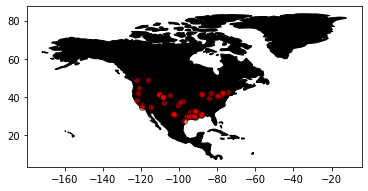

In [101]:
# restricting to North America.
ax = world[world.continent == 'North America'].plot(
    color='black', edgecolor='black')

# now ploting ``GeoDataFrame``.
gdf.plot(ax=ax, color='red', edgecolor='black', alpha=.5)

plt.show()

In [163]:
gdf.explore(
     column="Region", # make choropleth based on column
     tooltip="Hub_name", # show value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     cmap="Set1", # use "Set1" matplotlib colormap
     style_kwds=dict(color="black"), # use black outline
    )

In [103]:
america = world[world['continent'] =='North America']

america.explore()

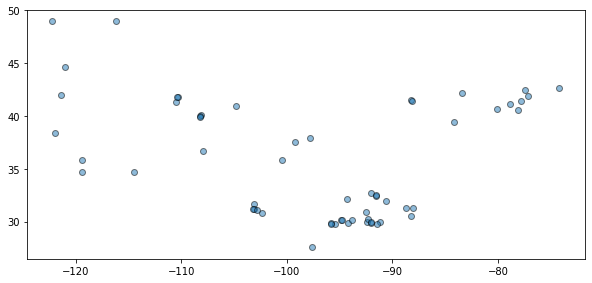

In [146]:
ax1 = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')


gdf.plot(ax=ax, color='red', edgecolor='black', alpha=.5)

plt.show()

In [166]:
m = folium.Map(location=[45.523, -122.675], width=750, height=500)
m = folium.Map(location=[45.523, -122.675], tiles='cartodb positron')
m = folium.Map(
   location=[45.523, -122.675],
   zoom_start=4,
   tiles='OpenStreetMap',
   attr='Google OpenStreetMap')
m